In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install matplotlib-venn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

from IPython import get_ipython
ipython = get_ipython()
if ipython is not None:
    ipython.history_manager.enabled = False

import os

os.chdir("/Users/dudugalbinski/Desktop/IBM Data Analyst/DA CAPSTONE/MY VERSION")
print("Current working directory:", os.getcwd())

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Current working director

In [2]:
clean_df = pd.read_csv("/Users/dudugalbinski/Desktop/IBM Data Analyst/DA CAPSTONE/MY VERSION/cleaned_survey_data.csv")
print(clean_df.shape)       # number of rows and columns

(65437, 117)


In [3]:
import os
print(os.getcwd())

/Users/dudugalbinski/Desktop/IBM Data Analyst/DA CAPSTONE/MY VERSION


# PART 3: Programming Languages and Databases Analysis:


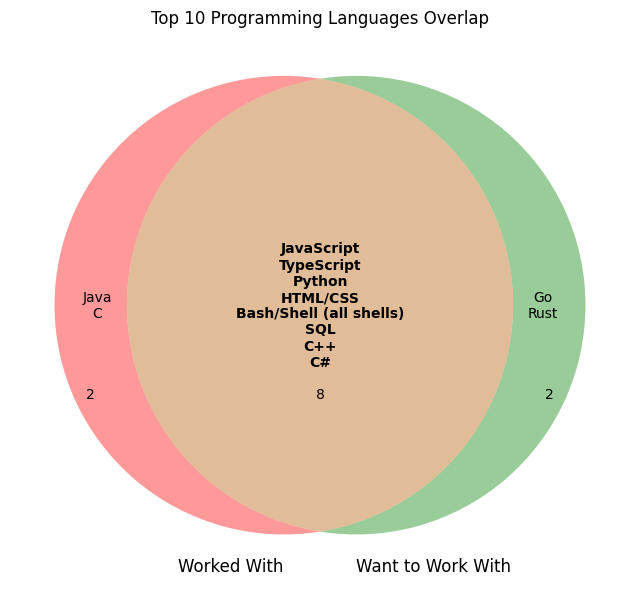

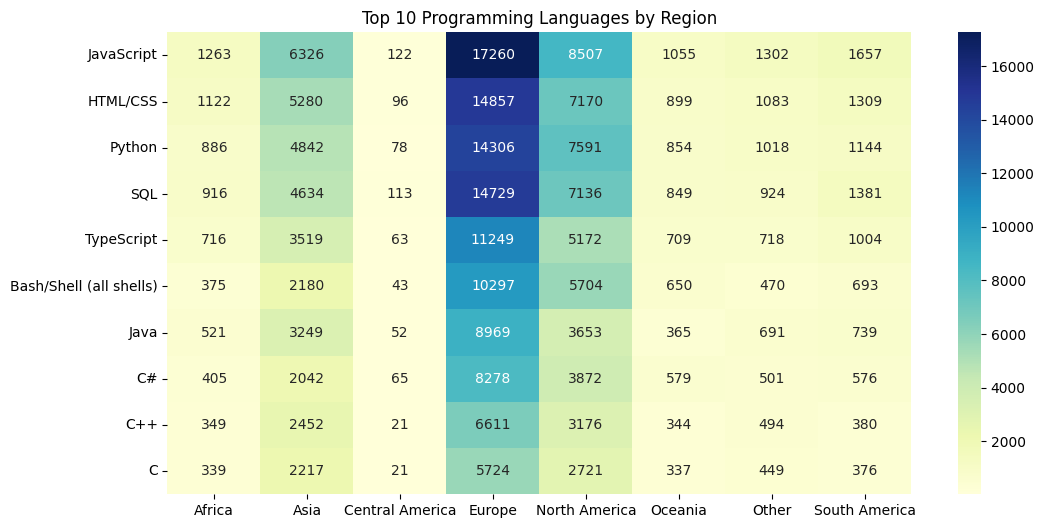

In [4]:
## Step 1 Prepare the Data
from collections import Counter

# Split semicolon-separated languages into lists
worked = clean_df['LanguageHaveWorkedWith'].dropna().str.split(';')
want = clean_df['LanguageWantToWorkWith'].dropna().str.split(';')

# Flatten lists and count frequency
worked_counter = Counter([lang for sublist in worked for lang in sublist])
want_counter = Counter([lang for sublist in want for lang in sublist])

# Convert to DataFrame for easier plotting
lang_df = pd.DataFrame({
    'WorkedWith': pd.Series(worked_counter),
    'WantToWorkWith': pd.Series(want_counter)
}).fillna(0).sort_values(by='WorkedWith', ascending=False)
lang_df

#Step 2 Venn Diagram
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Top 10 languages for worked and want-to-work
top_worked = set(lang_df['WorkedWith'].sort_values(ascending=False).head(10).index)
top_want = set(lang_df['WantToWorkWith'].sort_values(ascending=False).head(10).index)

# Compute intersections and uniques
intersection = top_worked & top_want
only_worked = top_worked - top_want
only_want = top_want - top_worked

# Create Venn diagram
plt.figure(figsize=(8, 8))
v = venn2(subsets=(len(only_worked), len(only_want), len(intersection)), set_labels=('Worked With', 'Want to Work With'))

# --- Adjusted text placement ---
plt.text(-0.5, 0.0, "\n".join(only_worked),
         ha='center', va='center', fontsize=10)
plt.text(0.5, 0.0, "\n".join(only_want),
         ha='center', va='center', fontsize=10)
plt.text(0, 0, "\n".join(intersection),
         ha='center', va='center', fontsize=10, fontweight='bold')

# Move default count labels to the bottom of each circle/section
for text in v.subset_labels:
    if text:  # sometimes some subset_labels are None
        x, y = text.get_position()
        text.set_position((x, y - 0.20))  # move downward

plt.title('Top 10 Programming Languages Overlap')
plt.show()

print(
    ""
)


# Programming Language Trends by Region


#Step 1
valid_languages = clean_df[['Region', 'LanguageHaveWorkedWith']].dropna()
valid_languages = valid_languages[valid_languages['LanguageHaveWorkedWith'].apply(lambda x: isinstance(x, str))]

#Step 2: Split and flatten
valid_languages = valid_languages.assign(
    Language=valid_languages['LanguageHaveWorkedWith'].str.split(';')
).explode('Language')

valid_languages['Language'] = valid_languages['Language'].str.strip()

#Step 3: Count Languages Per Region
region_lang_counts = valid_languages.groupby(['Region', 'Language']).size().reset_index(name='Count')

# Pivot for heatmap
region_lang_pivot = region_lang_counts.pivot(index='Language', columns='Region', values='Count').fillna(0)

# Keep top 10 languages globally
top_languages = region_lang_pivot.sum(axis=1).sort_values(ascending=False).head(10).index
region_lang_pivot = region_lang_pivot.loc[top_languages]

# Step 4: Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(region_lang_pivot, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Top 10 Programming Languages by Region')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Insight:
We can see that JavaScript is the most popular programming language across all regions.
HTML/CSS ranks as the runner-up in Africa, Asia, Europe, and Oceania, while Python takes second place in North America and SQL in both Central and South America.

DatabaseWantToWorkWith
PostgreSQL    24005
SQLite        13489
MySQL         12269
MongoDB       10982
Redis         10847
Name: count, dtype: int64


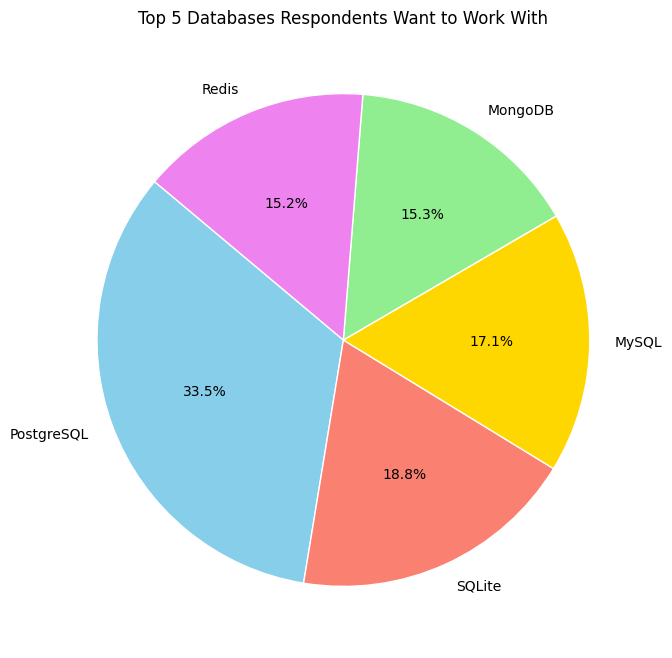

Top Programing Languages:
JavaScript    37492
HTML/CSS      31816
Python        30719
SQL           30682
TypeScript    23150
Name: count, dtype: int64


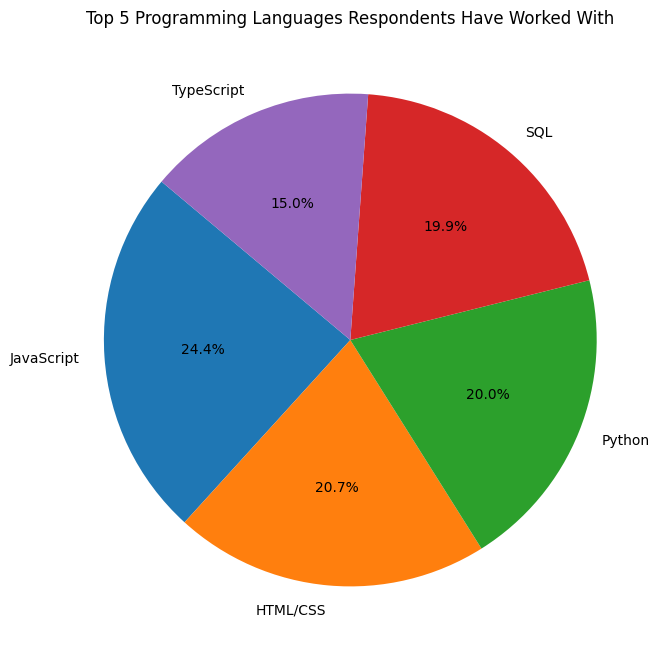

In [8]:
# --- Split combined entries for Databases Want to Work With---
# Some responses have multiple databases separated by ";"
all_dbs = clean_df['DatabaseWantToWorkWith'].str.split(';').explode()

# --- Count occurrences and get top 5 ---
top_5_dbs = all_dbs.value_counts().nlargest(5)
print(top_5_dbs)

# --- Plot pie chart ---
plt.figure(figsize=(8,8))
plt.pie(
    top_5_dbs,
    labels=top_5_dbs.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['skyblue','salmon','gold','lightgreen','violet'],
    wedgeprops={'edgecolor':'white'}
)
plt.title('Top 5 Databases Respondents Want to Work With')
plt.show()

print("="*100)
print("Top Programing Languages:" )

# Split multiple language entries per respondent into separate values
lang_series = clean_df['LanguageHaveWorkedWith'].dropna().str.split(';')

# Flatten the list and count the frequency of each language
lang_counts = pd.Series([lang for sublist in lang_series for lang in sublist]).value_counts()

# Select the top 5 most common languages
top_5_langs = lang_counts.head(5)
print(top_5_langs)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_langs,
    labels=top_5_langs.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab10.colors
)

plt.title("Top 5 Programming Languages Respondents Have Worked With")
plt.show()

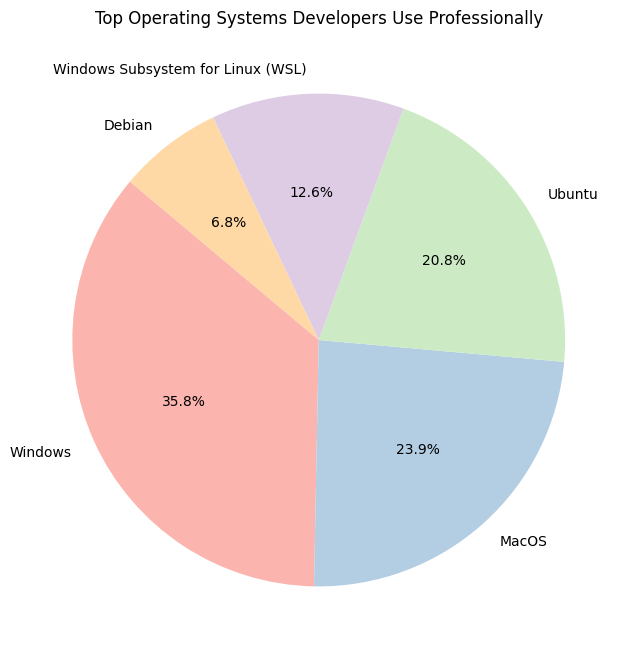

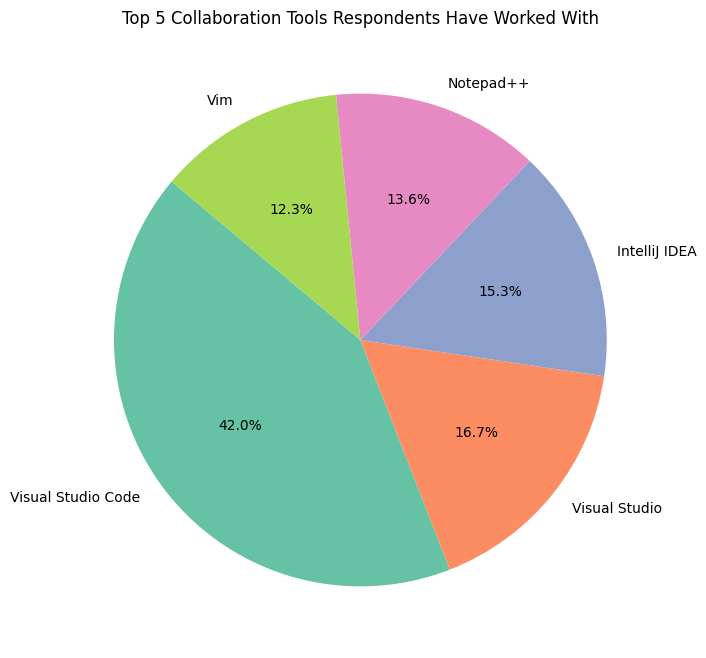

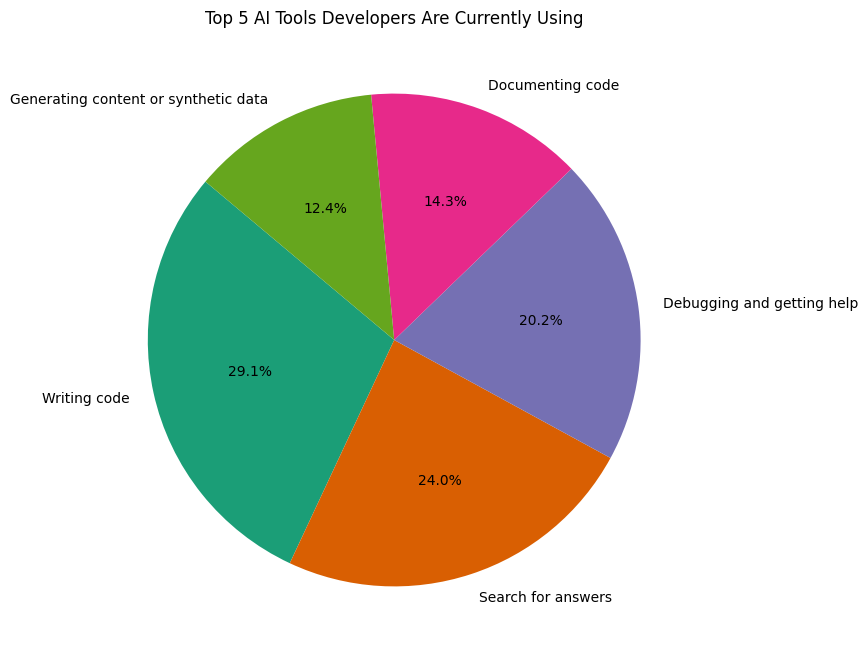

In [9]:
# Split multiple OS entries per respondent into separate values
os_series = clean_df['OpSysProfessional use'].dropna().str.split(';')

# Flatten the list and count how many times each OS appears
os_counts = pd.Series([os for sublist in os_series for os in sublist]).value_counts()

# Select the top 5 operating systems (you can adjust if fewer/more categories are preferred)
top_os = os_counts.head(5)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_os,
    labels=top_os.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)

plt.title("Top Operating Systems Developers Use Professionally")
plt.show()

# Split multiple collaboration tools per respondent into separate entries
collab_series = clean_df['NEWCollabToolsHaveWorkedWith'].dropna().str.split(';')

# Flatten the list and count occurrences of each collaboration tool
collab_counts = pd.Series([tool.strip() for sublist in collab_series for tool in sublist]).value_counts()

# Select the top 5 collaboration tools
top_5_collab = collab_counts.head(5)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_collab,
    labels=top_5_collab.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set2.colors
)

plt.title("Top 5 Collaboration Tools Respondents Have Worked With")
plt.show()

# Split multiple AI tools per respondent into separate entries
ai_tools_series = clean_df['AIToolCurrently Using'].dropna().str.split(';')

# Flatten the list and count the frequency of each tool
ai_tools_counts = pd.Series([tool.strip() for sublist in ai_tools_series for tool in sublist]).value_counts()

# Select the top 5 most used AI tools
top_5_ai_tools = ai_tools_counts.head(5)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_ai_tools,
    labels=top_5_ai_tools.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Dark2.colors
)

plt.title("Top 5 AI Tools Developers Are Currently Using")
plt.show()


# Part 3 is complete:
📊 Part 3 — Key Findings and Insights:

1) Venn diagram → Identify which languages are growing vs. declining:

- **Intersection**: Most languages fall here. They are both heavily used AND highly desired.
These are the "sweet spot" languages - popular and satisfying.
These are the safest bets for career development.
  
- **Left circle only** (Worked With): Languages like **Java & C** that are heavily used NOW but NOT in the top 10 desired languages are potentially declining.
These might now be "legacy" or "necessary but unloved" languages.

- **Right circle only** (Want to Work With): Languages people want to learn but aren't yet in the top 10 most-used.
These are "trending" or "aspirational" languages like **Go and Rust**.

2) Heatmap
   
- We can see that **JavaScript** is the most popular programming language across all regions.
- **HTML/CSS** ranks as the runner-up in Africa, Asia, Europe, and Oceania, while **Python** takes second place in North America and **SQL** in both Central and South America.

3) Pie Charts
   
- **Windows** dominates the operating systems respondents have worked with. Followed by **MacOS** and **Ubuntu**.
- **Visual Studio Code** dominates the collaboration tools respondents have worked with.
- AI is already being heavily used to write code, search for answers, and debugging code.
- Over 10% of respondents also use AI for documenting code and generating content or synthetic data.

# PART 4.1: Global Compensation Analysis 

Number of responses with ConvertedCompYearly: 23435


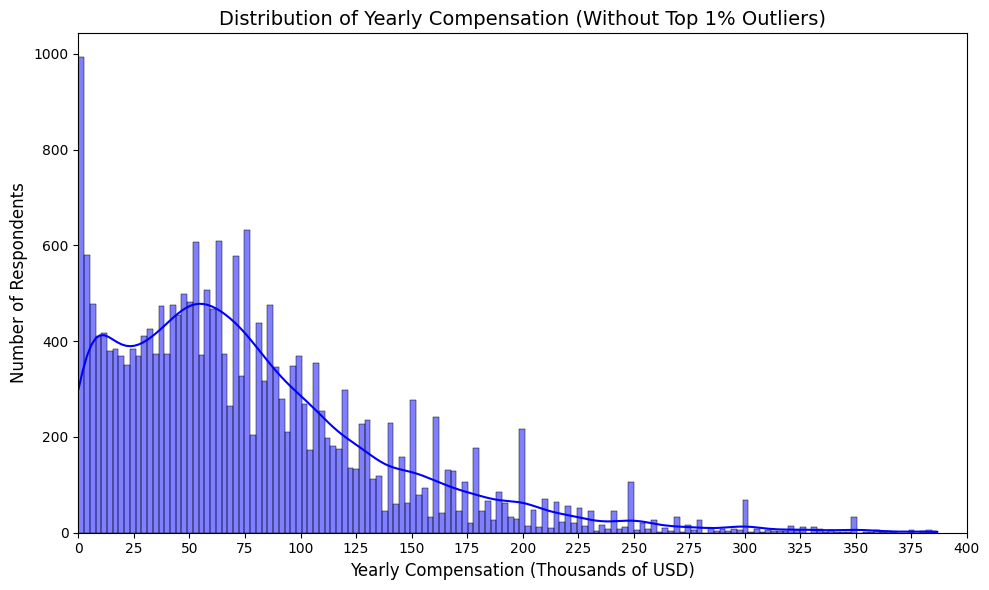

In [6]:
# Show full numbers in outputs
pd.options.display.float_format = '{:,.2f}'.format

count_comp = clean_df['ConvertedCompYearly'].count()
print(f"Number of responses with ConvertedCompYearly: {count_comp}")

# Prepare data
comp = clean_df['ConvertedCompYearly'].dropna()
upper_limit = comp.quantile(0.99)   # remove top 1% outliers
comp = comp[comp <= upper_limit]

# Convert to thousands of USD
comp_k = comp / 1000

# Plot the histogram and KDE distribution
plt.figure(figsize=(10, 6))
sns.histplot(comp_k, bins=150, kde=True, color='blue', edgecolor= 'Black')

plt.title('Distribution of Yearly Compensation (Without Top 1% Outliers)', fontsize=14)
plt.xlabel('Yearly Compensation (Thousands of USD)', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Set x-axis range (0–400K USD)
plt.xlim(0, 400)

# Add ticks every 25K (i.e., 25 thousand)
plt.xticks(np.arange(0, 401, 25))

plt.tight_layout()
plt.show()

In [8]:
# Filter only full-time employed respondents
ft_employed = clean_df[clean_df['EmploymentCategory'] == 'Employed Full-Time']

# Calculate mean and median compensation
mean_comp = ft_employed['ConvertedCompYearly'].mean()
median_comp = ft_employed['ConvertedCompYearly'].median()

print(f"Mean Converted Compensation (Full-Time Employees): ${mean_comp:,.2f}")
print(f"Median Converted Compensation (Full-Time Employ): ${median_comp:,.2f}")


Mean Converted Compensation (Full-Time Employees): $88,708.68
Median Converted Compensation (Full-Time Employ): $69,814.00


💰 Mean Yearly Compensation by Region (Non-Students):
Region
North America     151,348.95
Oceania           100,327.24
Africa             96,390.88
Europe             71,547.26
Central America    53,582.86
Asia               52,214.03
South America      50,144.22
Name: ConvertedCompYearly, dtype: float64


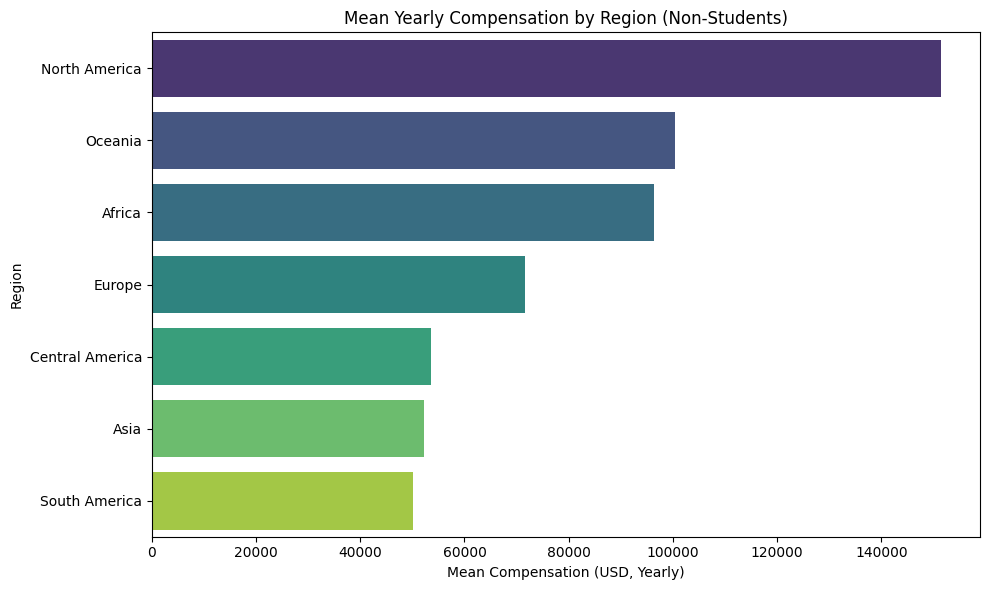

💰 Mean Yearly Compensation by Region (Students):
Region
Oceania           101,835.60
North America      73,346.32
Europe             32,204.09
Africa             31,890.26
Central America    23,444.00
Asia               22,234.83
South America      17,104.34
Name: ConvertedCompYearly, dtype: float64


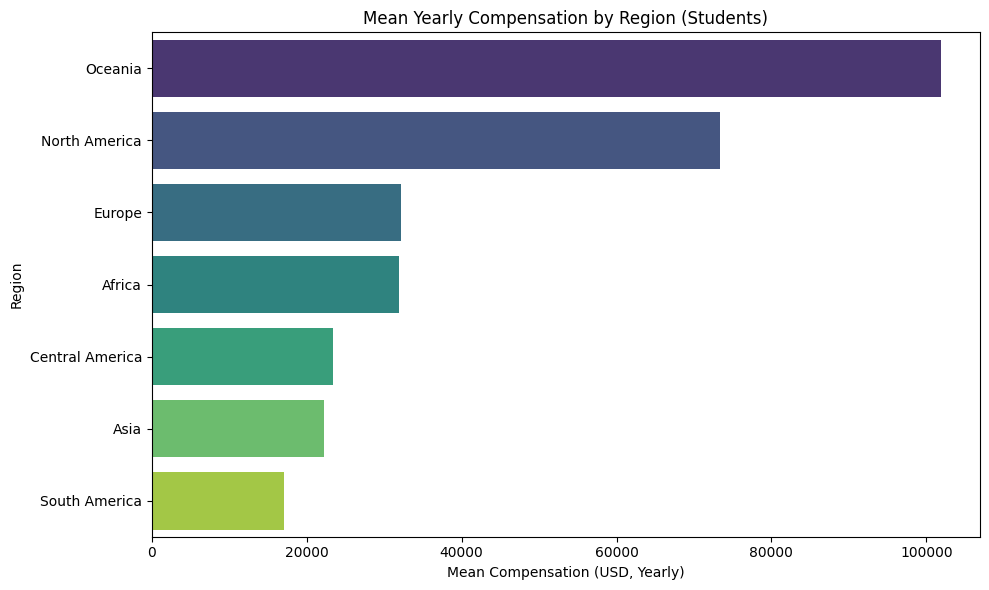

In [9]:
# Filter for non-students only
non_students = clean_df[(clean_df['Student'] == 'No') & (clean_df['Region'] != 'Other')]

# Group by region and calculate mean compensation
mean_comp_region = (
    non_students.groupby('Region')['ConvertedCompYearly']
    .mean()
    .sort_values(ascending=False)
)

# Display results as a table
print("💰 Mean Yearly Compensation by Region (Non-Students):")
print(mean_comp_region.round(2))

# --- Visualization ---
plt.figure(figsize=(10,6))
sns.barplot(
    x=mean_comp_region.values,
    y=mean_comp_region.index,
    hue=mean_comp_region.index,   # ✅ assign hue to match y
    palette='viridis',
    legend=False                  # ✅ hide redundant legend
)
plt.title("Mean Yearly Compensation by Region (Non-Students)")
plt.xlabel("Mean Compensation (USD, Yearly)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

# Filter for students only
non_students = clean_df[(clean_df['Student'] == 'Yes') & (clean_df['Region'] != 'Other')]

# Group by region and calculate mean compensation
mean_comp_region = (
    non_students.groupby('Region')['ConvertedCompYearly']
    .mean()
    .sort_values(ascending=False)
)

# Display results as a table
print("💰 Mean Yearly Compensation by Region (Students):")
print(mean_comp_region.round(2))

# --- Visualization ---
plt.figure(figsize=(10,6))
sns.barplot(
    x=mean_comp_region.values,
    y=mean_comp_region.index,
    hue=mean_comp_region.index,   # ✅ assign hue to match y
    palette='viridis',
    legend=False                  # ✅ hide redundant legend
)
plt.title("Mean Yearly Compensation by Region (Students)")
plt.xlabel("Mean Compensation (USD, Yearly)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

### Insights from Student vs. Non-Student Analysis:
1) In North America, Europe, Asia, and Central America, developers tend to double their income after completing their studies. The gap is even larger in Africa and South America, where non-students earn nearly three times more than students, suggesting limited access to high-paying roles before graduation.

Future Next step: Analyze the correlation between education level and compensation to assess whether this relationship is stronger in Africa and South America compared to North America and Europe.

2) Oceania stands out as a major outlier, with students and non-students reporting similar compensation levels, averaging around $100K USD per year.

The next step would be to investigate why Oceania’s results differ so significantly from other regions around the world.

In [12]:
# Finding top countries by region
# Filter out missing or irrelevant data
df_region = clean_df[
    (clean_df['Region'].notna()) &
    (clean_df['Region'] != 'Other') &
    (clean_df['ConvertedCompYearly'].notna())
]

# Count number of responses per country
country_counts = df_region['Country'].value_counts()

# Keep only countries with at least 100 responses
valid_countries = country_counts[country_counts >= 100].index
df_region = df_region[df_region['Country'].isin(valid_countries)]

# Group by Region and Country to calculate mean compensation
region_country_mean = (
    df_region.groupby(['Region', 'Country'])['ConvertedCompYearly']
    .mean()
    .reset_index()
)

# Find the top country by mean compensation in each region
top_countries = (
    region_country_mean.loc[
        region_country_mean.groupby('Region')['ConvertedCompYearly'].idxmax()
    ]
    .sort_values('ConvertedCompYearly', ascending=False)
)

# Display result
print("💰 Highest Mean Compensation by Country within Each Region (≥10 responses):\n")
print(top_countries[['Region', 'Country', 'ConvertedCompYearly']].round(2))


💰 Highest Mean Compensation by Country within Each Region (≥10 responses):

           Region                   Country  ConvertedCompYearly
34  North America  United States of America           161,072.34
0          Africa              South Africa           132,393.85
5            Asia                    Israel           119,981.97
28         Europe               Switzerland           118,554.66
35        Oceania                 Australia           106,375.12
38  South America                    Brazil            51,216.23


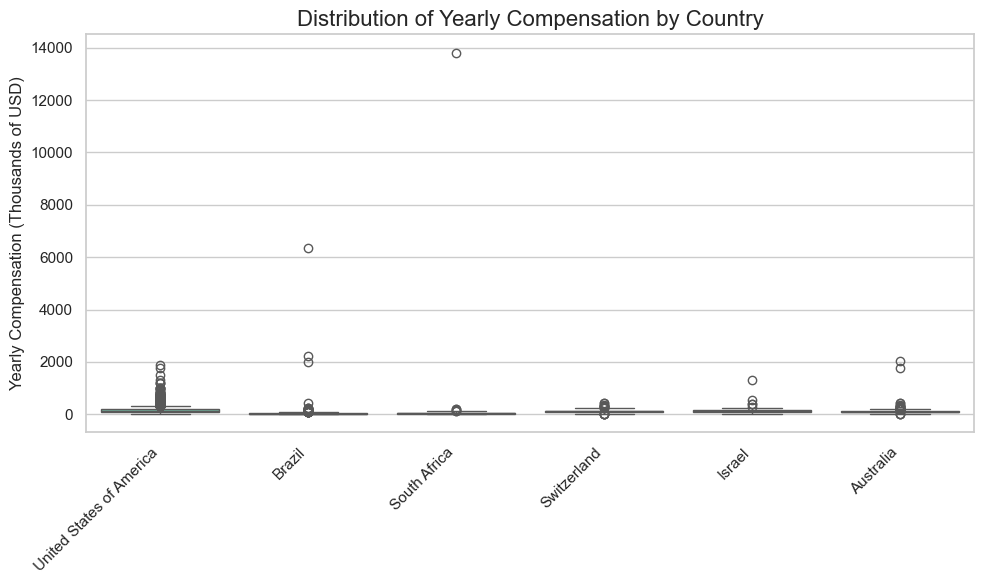

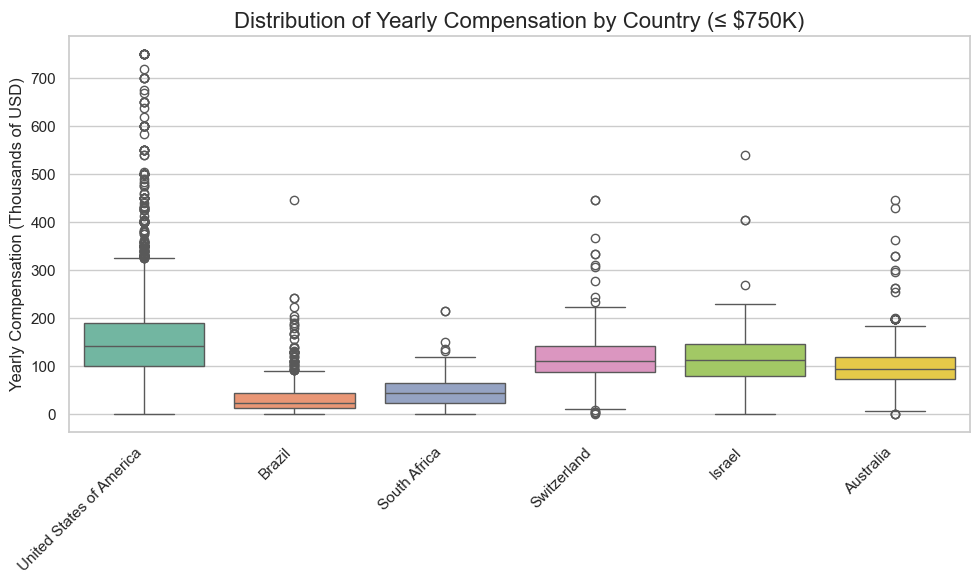

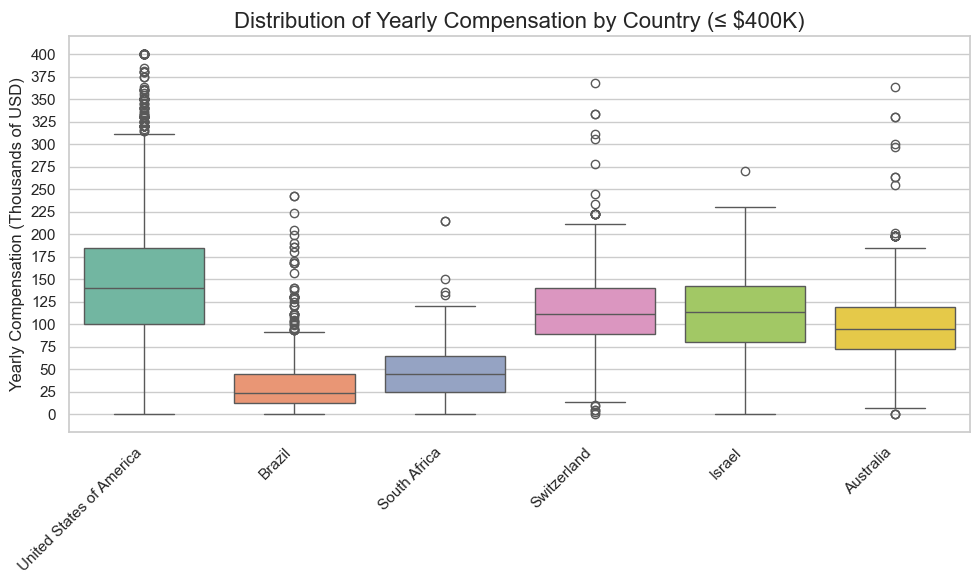

In [13]:
# Analyzing countries (with at least 100 respondents) with the highest mean compensation for each region.
# Analyzing the compensation distribution:

sns.set(style="whitegrid")

# 1) Countries of interest
countries = [
    'United States of America',
    'South Africa',
    'Israel',
    'Switzerland',
    'Brazil',
    'Australia'
]

def make_comp_boxplot(df, countries, max_comp=None, title="", add_25k_ticks=False):
    """
    df: dataframe with Country and ConvertedCompYearly
    countries: list of countries to keep
    max_comp: upper cap for compensation (in USD) or None
    """
    # filter
    df_f = df[
        (df['Country'].isin(countries)) &
        (df['ConvertedCompYearly'].notna())
    ].copy()
    
    if max_comp is not None:
        df_f = df_f[df_f['ConvertedCompYearly'] <= max_comp]
    
    # convert to thousands
    df_f['CompK'] = df_f['ConvertedCompYearly'] / 1000

    # plot
    plt.figure(figsize=(10,6))
    sns.boxplot(
        data=df_f,
        x='Country',
        y='CompK',
        hue='Country',     # avoids seaborn future warning
        palette='Set2',
        legend=False
    )
    plt.title(title, fontsize=16)
    plt.xlabel('', fontsize=12)
    plt.ylabel('Yearly Compensation (Thousands of USD)', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    if add_25k_ticks:
        plt.yticks(np.arange(0, 401, 25))  # 0 to 400k in steps of 25k

    plt.tight_layout()
    plt.show()


# --- original / full version ---
make_comp_boxplot(
    clean_df,
    countries,
    max_comp=None,
    title="Distribution of Yearly Compensation by Country"
)

# --- zoomed to 750k ---
make_comp_boxplot(
    clean_df,
    countries,
    max_comp=750000,
    title="Distribution of Yearly Compensation by Country (≤ $750K)",
)

# --- zoomed to 400k with 25k ticks ---
make_comp_boxplot(
    clean_df,
    countries,
    max_comp=400000,
    title="Distribution of Yearly Compensation by Country (≤ $400K)",
    add_25k_ticks=True
)


### Insight from Boxplots:
We can see from the box plots that there are numerous outliers in the upper boundaries of compensation. 
This shows us how skewed the distribution is, with the mean compensation being much higher than the median compensation.

### Removing outliers from compensation for further analysis:

In [14]:
# Make a copy of the original dataset
df_no_outliers = clean_df.copy()

# Drop NaNs temporarily to calculate IQR
comp_data = df_no_outliers['ConvertedCompYearly'].dropna()

# Calculate Q1, Q3, and IQR
Q1 = comp_data.quantile(0.25)
Q3 = comp_data.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter dataset to remove outliers
df_no_outliers = df_no_outliers[
    (df_no_outliers['ConvertedCompYearly'] >= lower_bound) & 
    (df_no_outliers['ConvertedCompYearly'] <= upper_bound)
]

# Check new dataset shape
print(f"Original dataset shape: {clean_df.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")


Original dataset shape: (65437, 117)
Dataset shape after removing outliers: (22457, 117)


### Compensation vs Work Experience   &   Compensation vs Job Satisfaction:

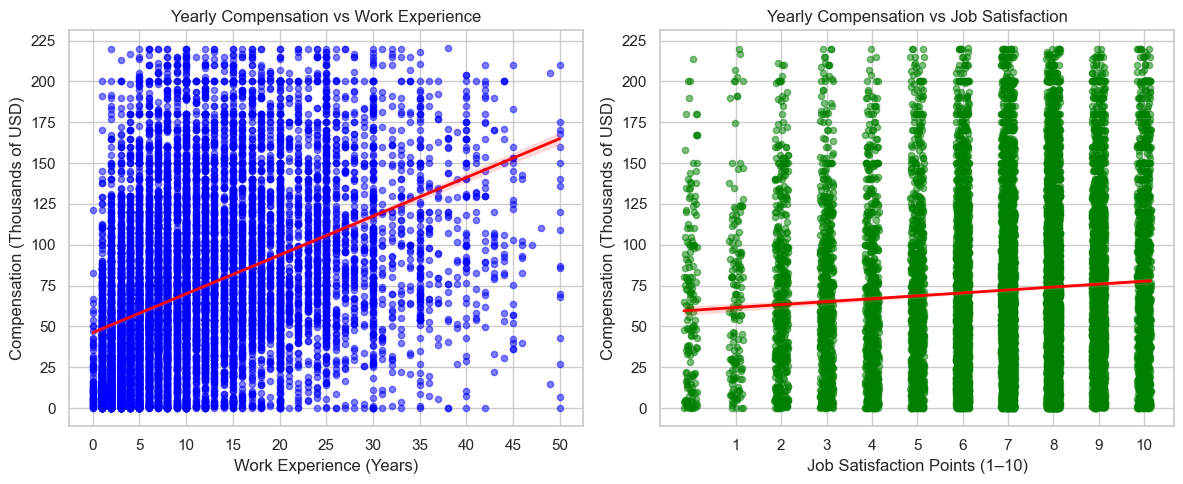

In [15]:
# Prepare data: remove missing values and convert compensation to thousands
df_plot = df_no_outliers[['ConvertedCompYearly', 'WorkExp', 'JobSat']].dropna().copy()
df_plot['CompK'] = df_plot['ConvertedCompYearly'] / 1000  # Convert to thousands (K USD)

plt.figure(figsize=(12, 5))

# --- Plot 1: Compensation vs Work Experience ---
plt.subplot(1, 2, 1)
sns.regplot(
    data=df_plot,
    x='WorkExp',
    y='CompK',
    scatter_kws={'s': 20, 'alpha': 0.5, 'color': 'blue'},
    line_kws={'color': 'red', 'linewidth': 2}
)
plt.title('Yearly Compensation vs Work Experience', fontsize=12)
plt.xlabel('Work Experience (Years)')
plt.ylabel('Compensation (Thousands of USD)')

# Set ticks: every 5 years on x-axis, every 25K on y-axis
plt.xticks(np.arange(0, df_plot['WorkExp'].max() + 1, 5))
plt.yticks(np.arange(0, df_plot['CompK'].max() + 25, 25))

# --- Plot 2: Compensation vs Job Satisfaction ---
plt.subplot(1, 2, 2)

# Add jitter to JobSat values for better visualization 
jittered_jobsat = df_plot['JobSat'] + np.random.uniform(-0.15, 0.15, size=len(df_plot))

sns.regplot(
    x=jittered_jobsat,
    y=df_plot['CompK'],
    scatter_kws={'s': 20, 'alpha': 0.5, 'color': 'green'},
    line_kws={'color': 'red', 'linewidth': 2}
)
plt.title('Yearly Compensation vs Job Satisfaction', fontsize=12)
plt.xlabel('Job Satisfaction Points (1–10)')
plt.ylabel('Compensation (Thousands of USD)')

# Set ticks: 1–10 on x-axis, every 25K on y-axis
plt.xticks(np.arange(1, 11, 1))
plt.yticks(np.arange(0, df_plot['CompK'].max() + 25, 25))

plt.tight_layout()
plt.show()


### Insight from Scatterplots:
This scatterplot is impossible to visualize without removing outliers in compensation. 

After removing outliers, we can see a stronger relationship between Work Experience and Compensation than betweeen Compensation and Job Satisfaction.

# PART 4.2: Deeper Compensation Analysis Focusing in the USA.
### Compensation vs tools and technologies:

In [23]:
# Filter for USA respondents
usa_df = df_no_outliers[df_no_outliers['Country'] == 'United States of America']
print( "Employment Status for U.S.A respondents:")
# See what values exist in EmploymentCategory for U.S. respondents
usa_df['EmploymentCategory'].value_counts(dropna=False)


# --- Filter for USA full-time employed respondents ---
usa_full_df = df_no_outliers[
    (df_no_outliers['Country'] == 'United States of America') &
    (df_no_outliers['EmploymentCategory'] == 'Employed Full-Time')
].copy()


Employment Status for U.S.A respondents:


In [19]:
mean_us_fulltime_comp = usa_full_df['ConvertedCompYearly'].mean()
print(f"Mean Yearly Compensation (U.S. Full-Time NO OUTLIERS): ${mean_us_fulltime_comp:,.2f}")


Mean Yearly Compensation (U.S. Full-Time NO OUTLIERS): $134,789.97


Top 5 Languages in the USA among Full-Time Employees: ['JavaScript', 'SQL', 'HTML/CSS', 'Python', 'Bash/Shell (all shells)']
Top 5 Databases in the USA among Full-Time Employees: ['PostgreSQL', 'Microsoft SQL Server', 'MySQL', 'SQLite', 'Redis']


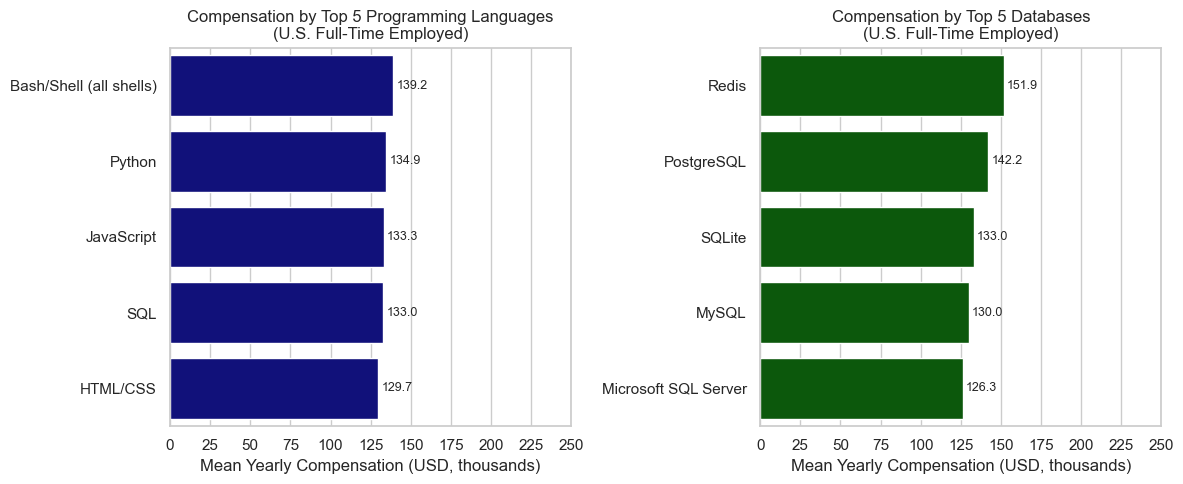

In [18]:
# --- Filter for USA full-time employed respondents using df_no_outliers ---
usa_full_df = df_no_outliers[
    (df_no_outliers['Country'] == 'United States of America') &
    (df_no_outliers['EmploymentCategory'] == 'Employed Full-Time')
]

# --- Get top 5 programming languages in the USA ---
top_full_langs = (
    usa_full_df['LanguageHaveWorkedWith']
    .dropna()
    .str.split(';')
    .explode()
    .value_counts()
    .head(5)
    .index
)

# --- Get top 5 databases in the USA ---
top_full_dbs = (
    usa_full_df['DatabaseHaveWorkedWith']
    .dropna()
    .str.split(';')
    .explode()
    .value_counts()
    .head(5)
    .index
)

print("Top 5 Languages in the USA among Full-Time Employees:", top_full_langs.tolist())
print("Top 5 Databases in the USA among Full-Time Employees:", top_full_dbs.tolist())

# --- Compensation by language (mean, in thousands) ---
lang_comp1 = (
    usa_full_df.dropna(subset=['LanguageHaveWorkedWith', 'ConvertedCompYearly'])
    .assign(LanguageHaveWorkedWith=usa_full_df['LanguageHaveWorkedWith'].str.split(';'))
    .explode('LanguageHaveWorkedWith')
    .query('LanguageHaveWorkedWith in @top_full_langs')
    .groupby('LanguageHaveWorkedWith')['ConvertedCompYearly']
    .mean()
    .div(1000)  # convert to thousands of USD
    .sort_values(ascending=False)
)

# --- Compensation by database (mean, in thousands) ---
db_comp1 = (
    usa_full_df.dropna(subset=['DatabaseHaveWorkedWith', 'ConvertedCompYearly'])
    .assign(DatabaseHaveWorkedWith=usa_full_df['DatabaseHaveWorkedWith'].str.split(';'))
    .explode('DatabaseHaveWorkedWith')
    .query('DatabaseHaveWorkedWith in @top_full_dbs')
    .groupby('DatabaseHaveWorkedWith')['ConvertedCompYearly']
    .mean()
    .div(1000)  # convert to thousands of USD
    .sort_values(ascending=False)
)

# --- Plotting ---
plt.figure(figsize=(12, 5))

# --- Languages ---
plt.subplot(1, 2, 1)
sns.barplot(
    x=lang_comp1.values,
    y=lang_comp1.index,
    color="darkblue"
)
plt.title('Compensation by Top 5 Programming Languages\n(U.S. Full-Time Employed)')
plt.xlabel('Mean Yearly Compensation (USD, thousands)')
plt.ylabel('')
plt.xlim(0, 250)
plt.xticks(np.arange(0, 275, 25))

# Add value labels
for i, v in enumerate(lang_comp1.values):
    plt.text(v + 2, i, f"{v:.1f}", va='center', fontsize=9)

# --- Databases ---
plt.subplot(1, 2, 2)
sns.barplot(
    x=db_comp1.values,
    y=db_comp1.index,
    color="darkgreen"
)
plt.title('Compensation by Top 5 Databases\n(U.S. Full-Time Employed)')
plt.xlabel('Mean Yearly Compensation (USD, thousands)')
plt.ylabel('')
plt.xlim(0, 250)
plt.xticks(np.arange(0, 275, 25))

# Add value labels
for i, v in enumerate(db_comp1.values):
    plt.text(v + 2, i, f"{v:.1f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()


Top 5 Collaboration Tools (U.S. Full-Time): ['Visual Studio Code', 'Visual Studio', 'Vim', 'Notepad++', 'IntelliJ IDEA']
Top 5 Operating Systems (U.S. Full-Time): ['Windows', 'MacOS', 'Ubuntu', 'Windows Subsystem for Linux (WSL)', 'Red Hat']


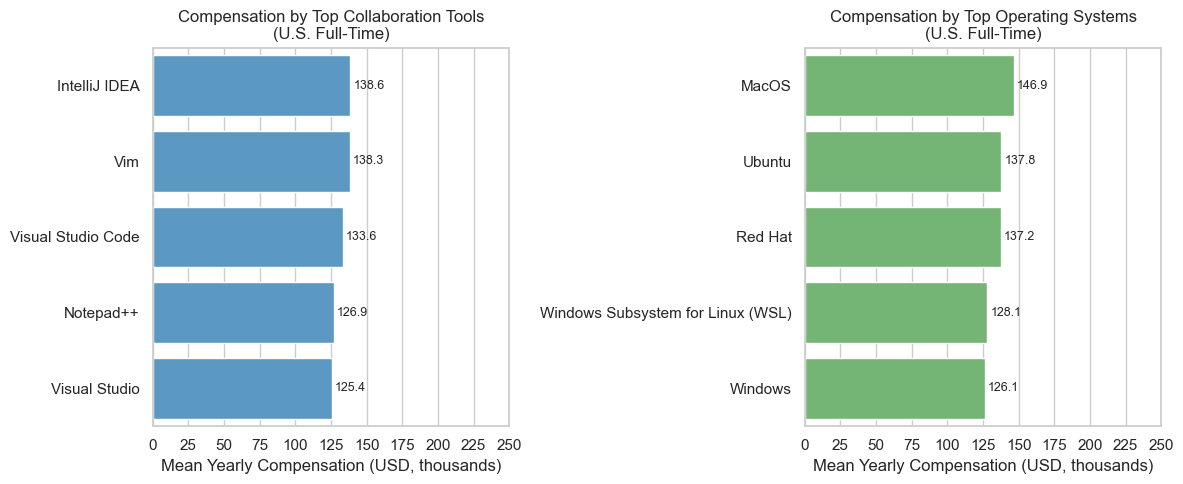

In [55]:
# --- 1. Get top 5 collaboration tools used in the U.S. full-time dataset ---
top_collab = (
    usa_full_df['NEWCollabToolsHaveWorkedWith']
    .dropna()
    .str.split(';')
    .explode()
    .value_counts()
    .head(5)
    .index
)

# --- 2. Get top 5 operating systems used in the U.S. full-time dataset ---
top_os = (
    usa_full_df['OpSysProfessional use']
    .dropna()
    .str.split(';')
    .explode()
    .value_counts()
    .head(5)
    .index
)

print("Top 5 Collaboration Tools (U.S. Full-Time):", top_collab.tolist())
print("Top 5 Operating Systems (U.S. Full-Time):", top_os.tolist())

# --- 3. Mean compensation by collaboration tool (in thousands) ---
collab_comp = (
    usa_full_df.dropna(subset=['NEWCollabToolsHaveWorkedWith', 'ConvertedCompYearly'])
    .assign(NEWCollabToolsHaveWorkedWith=usa_full_df['NEWCollabToolsHaveWorkedWith'].str.split(';'))
    .explode('NEWCollabToolsHaveWorkedWith')
    .query('NEWCollabToolsHaveWorkedWith in @top_collab')
    .groupby('NEWCollabToolsHaveWorkedWith')['ConvertedCompYearly']
    .mean()
    .div(1000)  # to thousands
    .sort_values(ascending=False)
)

# --- 4. Mean compensation by operating system (in thousands) ---
os_comp = (
    usa_full_df.dropna(subset=['OpSysProfessional use', 'ConvertedCompYearly'])
    .assign(**{'OpSysProfessional use': usa_full_df['OpSysProfessional use'].str.split(';')})
    .explode('OpSysProfessional use')
    .query('`OpSysProfessional use` in @top_os')
    .groupby('OpSysProfessional use')['ConvertedCompYearly']
    .mean()
    .div(1000)  # to thousands
    .sort_values(ascending=False)
)

# --- 5. Plotting ---
plt.figure(figsize=(12, 5))

# Collaboration tools
plt.subplot(1, 2, 1)
sns.barplot(
    x=collab_comp.values,
    y=collab_comp.index,
    color="#4B9CD3"
)
plt.title('Compensation by Top Collaboration Tools\n(U.S. Full-Time)')
plt.xlabel('Mean Yearly Compensation (USD, thousands)')
plt.ylabel('')
plt.xlim(0, 250)
plt.xticks(np.arange(0, 275, 25))

# Add value labels
for i, v in enumerate(collab_comp.values):
    plt.text(v + 2, i, f"{v:.1f}", va='center', fontsize=9)

# Operating systems
plt.subplot(1, 2, 2)
sns.barplot(
    x=os_comp.values,
    y=os_comp.index,
    color="#6ABF69"
)
plt.title('Compensation by Top Operating Systems\n(U.S. Full-Time)')
plt.xlabel('Mean Yearly Compensation (USD, thousands)')
plt.ylabel('')
plt.xlim(0, 250)
plt.xticks(np.arange(0, 275, 25))

# Add value labels
for i, v in enumerate(os_comp.values):
    plt.text(v + 2, i, f"{v:.1f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()


### Insights on compensation vs tools and technologies:

An analysis of mean compensation among USA full-time employees reveals distinct patterns across programming languages, databases, collaboration tools, and operating systems:

1) Programming Languages: Developers using Bash/Shell report mean earnings approximately 10K higher than those working primarily with HTML/CSS.

2) Databases: Compensation differences are more pronounced in this category, with Redis users earning around 18K more than the average developer.

3) Collaboration Tools: Professionals using IntelliJ IDEA and Vim show the highest mean compensation among the top tools analyzed.

4) Operating Systems: Developers working on macOS earn roughly 12K above the overall mean and approximately 20K more than those using Windows.


-------------------------------------------------------------------------------------------------------------------------------------

Now I will continue to analyse compensation using usa_full_df, which has no outliers in compensation and filtered for full time employed respondents in the USA:

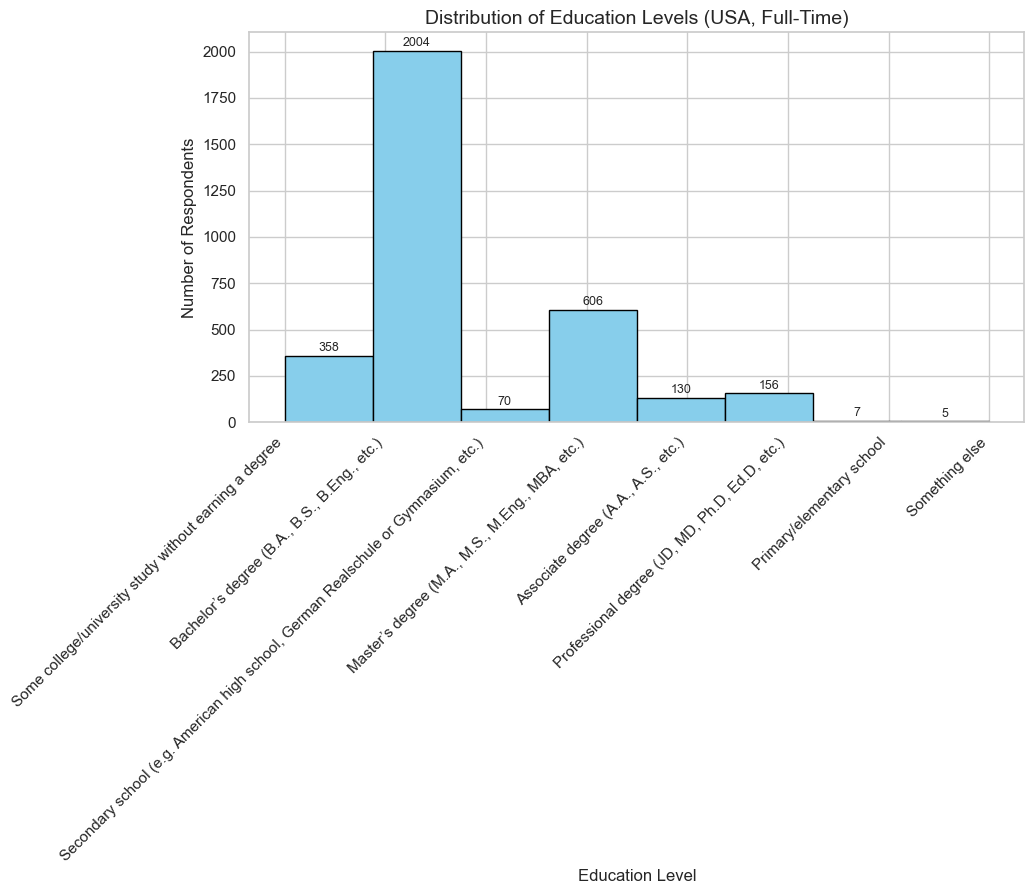

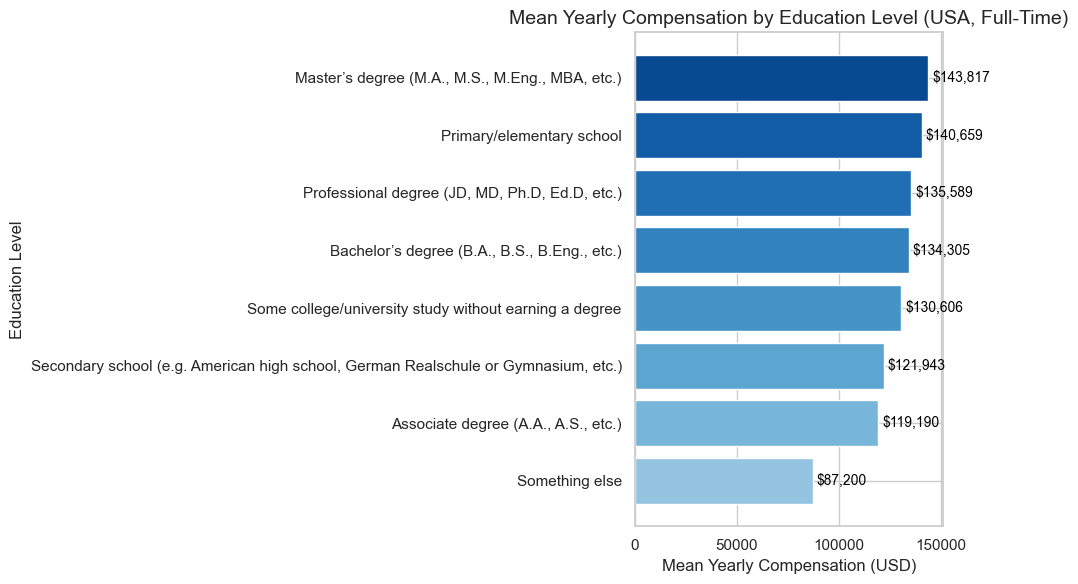

Spearman correlation between Education Level and Compensation:
                     EdLevelCode  ConvertedCompYearly
EdLevelCode                 1.00                 0.04
ConvertedCompYearly         0.04                 1.00


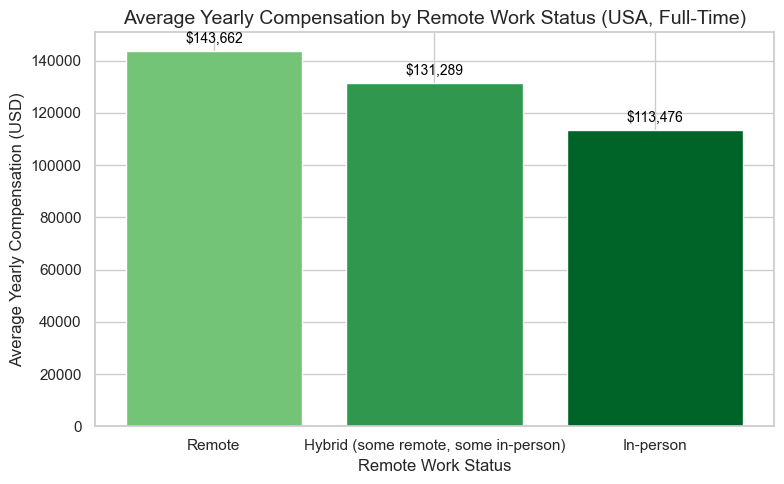

Spearman correlation between Remote Work Status and Compensation:
                     RemoteWorkCode  ConvertedCompYearly
RemoteWorkCode                 1.00                 0.15
ConvertedCompYearly            0.15                 1.00


In [37]:
# --- 1. Prepare data ---
edu_comp_df = usa_full_df[['EdLevel', 'ConvertedCompYearly']].dropna().copy()

# --- 2. Group by education level ---
edu_salary_stats = (
    edu_comp_df
    .groupby('EdLevel', as_index=False)['ConvertedCompYearly']
    .agg(['median', 'mean', 'count'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
)

# --- Histogram of Education Levels with Value Labels ---
plt.figure(figsize=(10,6))
bars = plt.hist(
    usa_full_df['EdLevel'].dropna(),
    bins=len(usa_full_df['EdLevel'].unique()),
    color='skyblue',
    edgecolor='black'
)

plt.title('Distribution of Education Levels (USA, Full-Time)', fontsize=14)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label cutoff
plt.subplots_adjust(bottom=0.3, top=0.95)

# --- Add value labels ---
counts, bins, patches = bars
for count, x in zip(counts, bins[:-1]):
    plt.text(
        x + (bins[1] - bins[0]) / 2,
        count + 10,                     # position slightly above bar
        f"{int(count)}",
        ha='center', va='bottom',
        fontsize=9
    )

plt.show()



# --- 3. Visualization with Value Labels ---
plt.figure(figsize=(10,6))
bars = plt.barh(
    edu_salary_stats['EdLevel'][::-1],
    edu_salary_stats['mean'][::-1],
    color=plt.cm.Blues(np.linspace(0.4, 0.9, len(edu_salary_stats)))
)

plt.title('Mean Yearly Compensation by Education Level (USA, Full-Time)', fontsize=14)
plt.xlabel('Mean Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')

# --- Add value labels to bars ---
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 2000,                      # position slightly after the bar
        bar.get_y() + bar.get_height() / 2,
        f"${width:,.0f}",                  # format with $ and commas
        va='center',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

# --- 4. Correlation (Spearman) ---
edu_comp_df['EdLevelCode'] = edu_comp_df['EdLevel'].astype('category').cat.codes
corr_spearman = edu_comp_df[['EdLevelCode', 'ConvertedCompYearly']].corr(method='spearman')
print("Spearman correlation between Education Level and Compensation:")
print(corr_spearman)
print("="*138)


# --- Remote Work vs Compensation Analysis (USA, Full-Time) ---

# 1. Select relevant columns and drop missing values
remote_comp_df = usa_full_df[['RemoteWork', 'ConvertedCompYearly']].dropna().copy()

# 2. Group by remote work status and calculate mean compensation
remote_salary_stats = (
    remote_comp_df
    .groupby('RemoteWork', as_index=False)['ConvertedCompYearly']
    .mean()
    .sort_values(by='ConvertedCompYearly', ascending=False)
)

# --- 3. Visualization with Value Labels ---
plt.figure(figsize=(8,5))
bars = plt.bar(
    remote_salary_stats['RemoteWork'],
    remote_salary_stats['ConvertedCompYearly'],
    color=plt.cm.Greens(np.linspace(0.5, 0.9, len(remote_salary_stats)))
)

plt.title('Average Yearly Compensation by Remote Work Status (USA, Full-Time)', fontsize=14)
plt.xlabel('Remote Work Status', fontsize=12)
plt.ylabel('Average Yearly Compensation (USD)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')

# --- Add value labels on top of bars ---
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # center of the bar
        height + 2000,                       # slightly above the bar
        f"${height:,.0f}",                   # formatted label
        ha='center', va='bottom',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

# 4. Correlation (Spearman)
remote_comp_df['RemoteWorkCode'] = remote_comp_df['RemoteWork'].astype('category').cat.codes
corr_spearman = remote_comp_df[['RemoteWorkCode', 'ConvertedCompYearly']].corr(method='spearman')
print("Spearman correlation between Remote Work Status and Compensation:")
print(corr_spearman)



### Insight:
We have that developers with a master degree have a higher average compensation. Developers with just an Associate degree still have a great yearly income of 119k USD in average, but that is about 25k USD less than developers with a master. Professionals with a Bachelor's or Professional Degree make in average the same amount. We have only 70 respondents that did not go to college after high school. They do very well, making in average a little bit more than developers with an Associate Degree. Sample is too small for developers with no high school diploma so we cannot take valid insights. 

We can see that developers who work in-person make 30k USD less in average than developers that work remote! Our anaysis suggests that remote work has a stronger correlation to compensation than education levels!

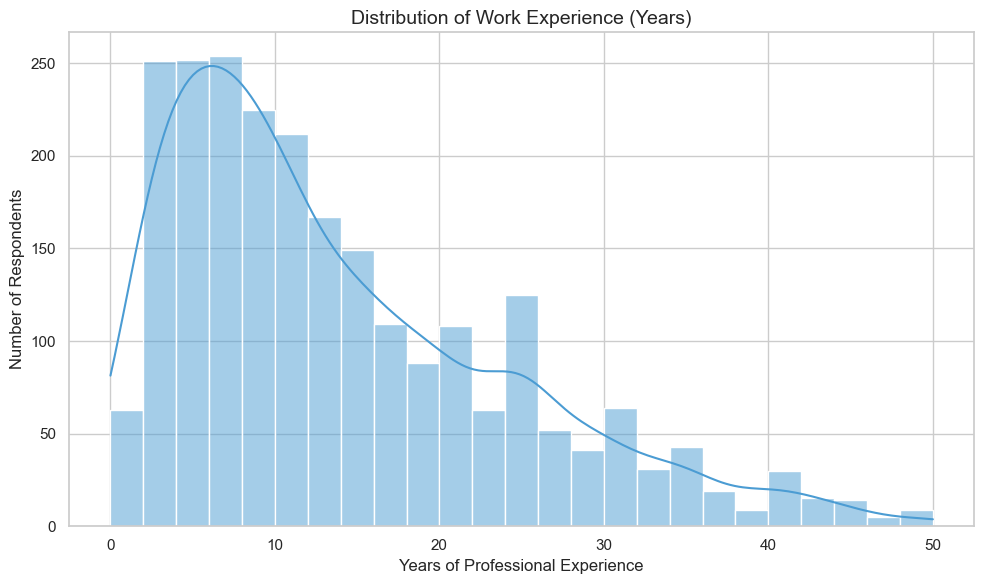

Mean years of experience: 13.8
Median years of experience: 11.0
Most common (mode) experience: 10.0


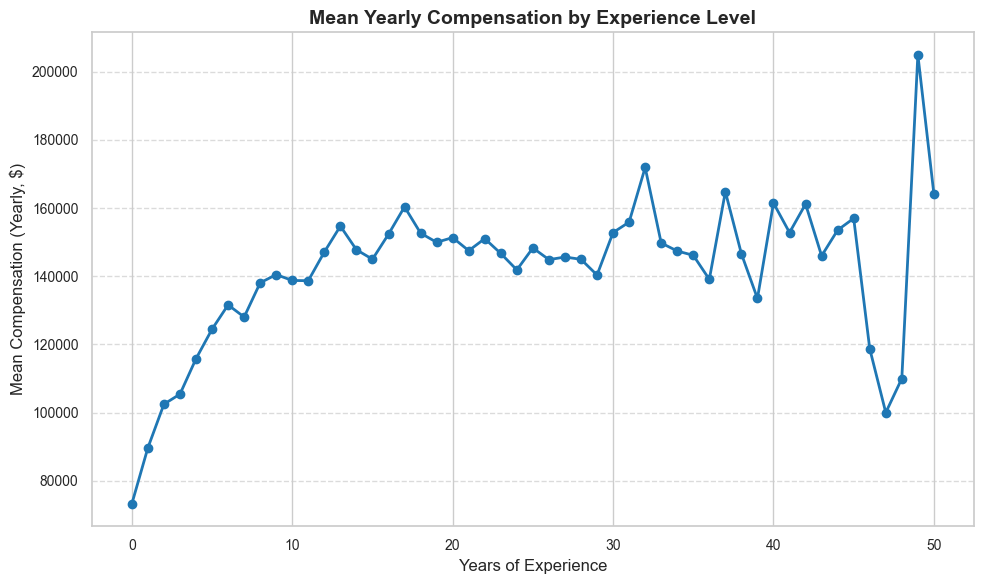

Pearson correlation between Work Experience and Compensation: 0.292


In [38]:
# Drop rows with missing values
df_exp = usa_full_df.dropna(subset=['WorkExp', 'ConvertedCompYearly']).copy()

# Convert WorkExp to numeric if needed
df_exp['WorkExp'] = pd.to_numeric(df_exp['WorkExp'], errors='coerce')

# Drop rows where conversion failed
df_exp = df_exp.dropna(subset=['WorkExp'])

# --- Plot histogram + KDE for WorkExp distribution ---
plt.figure(figsize=(10,6))
sns.histplot(df_exp['WorkExp'], bins=25, kde=True, color="#4B9CD3")
plt.title('Distribution of Work Experience (Years)', fontsize=14)
plt.xlabel('Years of Professional Experience', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.tight_layout()
plt.show()

# --- Summary stats ---
print("Mean years of experience:", df_exp['WorkExp'].mean().round(1))
print("Median years of experience:", df_exp['WorkExp'].median().round(1))
print("Most common (mode) experience:", df_exp['WorkExp'].mode().values[0])

# --- Calculate mean compensation by experience ---
mean_comp_by_exp = df_exp.groupby('WorkExp', as_index=False)['ConvertedCompYearly'].mean()

# --- Plot compensation vs experience ---
plt.figure(figsize=(10,6))
plt.plot(
    mean_comp_by_exp['WorkExp'],
    mean_comp_by_exp['ConvertedCompYearly'],
    marker='o',
    linestyle='-',
    color='#1f77b4',
    linewidth=2
)
plt.title("Mean Yearly Compensation by Experience Level", fontsize=14, weight='bold')
plt.xlabel("Years of Experience", fontsize=12)
plt.ylabel("Mean Compensation (Yearly, $)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# --- Calculate Pearson correlation between WorkExp and Compensation ---
corr_value = df_exp['WorkExp'].corr(df_exp['ConvertedCompYearly'], method='pearson')
print(f"Pearson correlation between Work Experience and Compensation: {corr_value:.3f}")


NOTE: Because the number of respondents drops significantly beyond 30 years of work experience, we should be cautious when analyzing mean compensation. The low sample size in this range may explain the large variations observed in mean compensation.

A next step here could be to calculate the pearson correlation filtering under 30 years of experience and see if the correlation is stronger.

### Insights from Compensation vs Experience Level:
1) The visualization shows that there is a sharp increase in compensation for the first 10 years of a developer's career in the USA.
2) After 10 years of experience it seems like this increase slows down and compensation settles at around 150k.
3) This could indicate that other factors start having a bigger effect on compensation once the developer completes 10 years of work experience.

---------------------------------------------------------------------------------------------------------------------
Lastly, let's see if Compensation plays a big role in Job Satisfaction (or vice versa):

/Users/dudugalbinski/Library/Python/3.9/lib/python/site-packages/pandas/core/arrays/base.py:725: RuntimeWarning: invalid value encountered in cast
  return np.array(self, dtype=dtype, copy=copy)


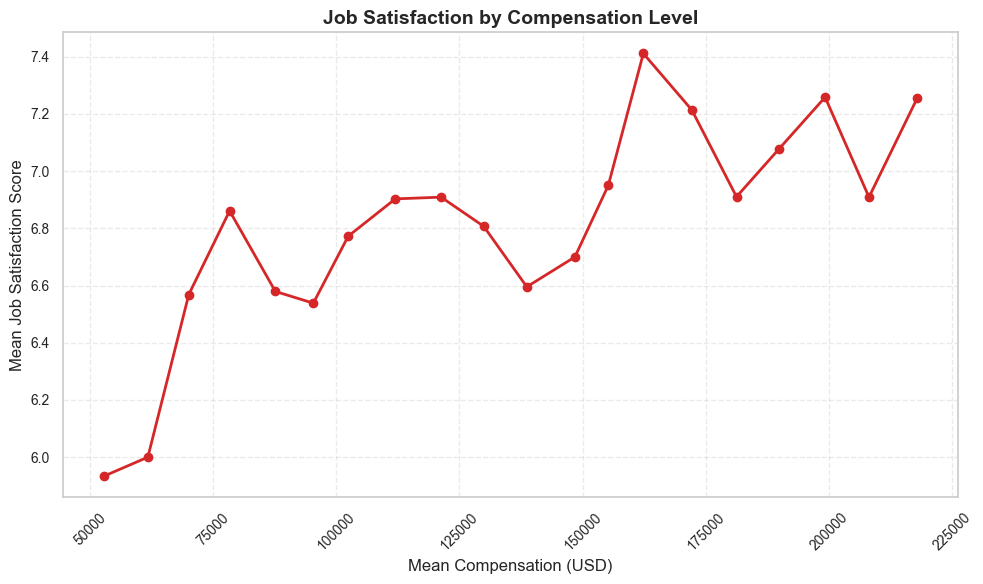


Pearson correlation between Compensation and Job Satisfaction: 0.095
Sample size: 2,361 respondents


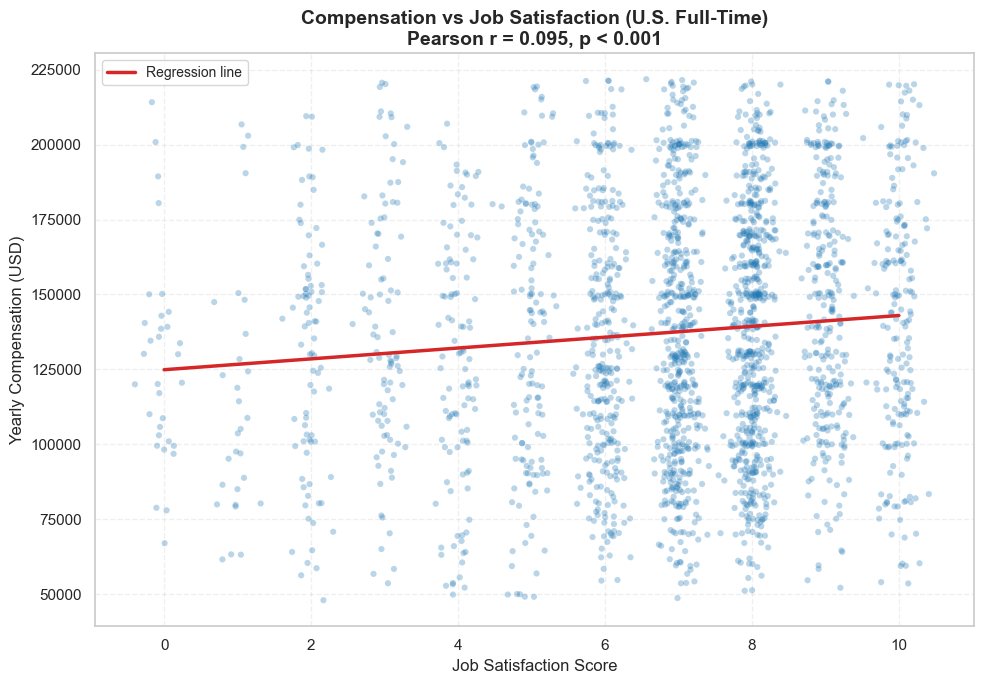


Regression equation: Compensation = 124,892 + 1,808 × JobSat
P-value: 3.53e-06


In [81]:
# --- 1. Prepare Data ---
corr_df = usa_full_df[['ConvertedCompYearly', 'JobSat']].dropna().copy()

# Remove outliers for better visualization (keep middle 98%)
comp_lower = corr_df['ConvertedCompYearly'].quantile(0.01)
comp_upper = corr_df['ConvertedCompYearly'].quantile(0.99)
corr_df = corr_df[
    (corr_df['ConvertedCompYearly'] >= comp_lower) &
    (corr_df['ConvertedCompYearly'] <= comp_upper)
]

# --- 2. Bin compensation and compute mean job satisfaction by bin ---
corr_df['CompBin'] = pd.cut(corr_df['ConvertedCompYearly'], bins=20)

# Convert Interval bins to string to avoid hashing warnings
corr_df['CompBinStr'] = corr_df['CompBin'].astype(str)

mean_jobsat_by_comp = corr_df.groupby(
    'CompBinStr',
    as_index=False,
    observed=False  # keep current behavior, silence FutureWarning
).agg({
    'ConvertedCompYearly': 'mean',
    'JobSat': 'mean'
})

# Sort by the actual compensation value (since strings may not be in order)
mean_jobsat_by_comp = mean_jobsat_by_comp.sort_values('ConvertedCompYearly')

# --- 3. Plot: Mean Job Satisfaction by Compensation ---
plt.figure(figsize=(10, 6))
plt.plot(
    mean_jobsat_by_comp['ConvertedCompYearly'],
    mean_jobsat_by_comp['JobSat'],
    marker='o',
    linestyle='-',
    color='#d62728',
    linewidth=2,
    markersize=6
)
plt.title("Job Satisfaction by Compensation Level", fontsize=14, weight='bold')
plt.xlabel("Mean Compensation (USD)", fontsize=12)
plt.ylabel("Mean Job Satisfaction Score", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.4)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# --- 4. Pearson correlation (on the de-outliered data) ---
corr_value = corr_df['ConvertedCompYearly'].corr(corr_df['JobSat'], method='pearson')
print(f"\nPearson correlation between Compensation and Job Satisfaction: {corr_value:.3f}")
print(f"Sample size: {len(corr_df):,} respondents")

# --- 5. Scatterplot with Jitter and Regression Line ---
np.random.seed(42)  # reproducible jitter

# Jitter
jitter_x = np.random.normal(0, 0.15, size=len(corr_df))
jitter_y = np.random.normal(0, corr_df['ConvertedCompYearly'].std() * 0.02, size=len(corr_df))

corr_df['JobSat_jittered'] = corr_df['JobSat'] + jitter_x
corr_df['Comp_jittered'] = corr_df['ConvertedCompYearly'] + jitter_y

plt.figure(figsize=(10, 7))
plt.scatter(
    corr_df['JobSat_jittered'],
    corr_df['Comp_jittered'],
    alpha=0.3,
    s=20,
    color='#1f77b4',
    edgecolors='none'
)

# Regression line on original (non-jittered) data
slope, intercept, r_value, p_value, std_err = stats.linregress(
    corr_df['JobSat'],
    corr_df['ConvertedCompYearly']
)
line_x = np.array([corr_df['JobSat'].min(), corr_df['JobSat'].max()])
line_y = slope * line_x + intercept

plt.plot(line_x, line_y, color='#d62728', linewidth=2.5, label='Regression line')

plt.title(
    f'Compensation vs Job Satisfaction (U.S. Full-Time)\nPearson r = {corr_value:.3f}, p < 0.001',
    fontsize=14, weight='bold'
)
plt.xlabel('Job Satisfaction Score', fontsize=12)
plt.ylabel('Yearly Compensation (USD)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='both', linestyle='--', alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# --- 6. Additional statistics ---
print(f"\nRegression equation: Compensation = {intercept:,.0f} + {slope:,.0f} × JobSat")
print(f"P-value: {p_value:.2e}")


### Insights from Job Satisfaction:
1) We can see that the correlation between compensation and job satisfaction is positive but very weak.
2) This indicates that variables other than compensation have a bigger effect on respondents job satisfaction.
3) Since this analysis is focused on compensation we can stop here, but a valid next step would be to see how different tools, technologies, and remote work correlate to job satisfaction!

# Part 4 is complete:

### 📊 Part 4.1 — Key Findings and Insights from the **global** analysis:

1) Insights from **Student vs. Non-Student Analysis**:

- In North America, Europe, Asia, and Central America, developers tend to **double** their income after completing their studies.
- The gap is even larger in Africa and South America, where non-students earn nearly **three times** more than students, suggesting limited access to high-paying roles before graduation.
- Recommended next step: Analyze the correlation between education level and compensation to assess whether this relationship is stronger in Africa and South America compared to North America and Europe
- Oceania stands out as a major outlier, with students and non-students reporting similar compensation levels, averaging around $100K USD per year.
- Recommended next step: Investigate why Oceania’s results differ so significantly from other regions around the world.

2) Insight from **Boxplots exploring distribution of compensation** among countries with the highest compensation average in their continenets:

- We can see from the box plots that there are **numerous outliers** in the upper boundaries of compensation. This shows us how **skewed** the **distribution** is, with the mean compensation being much higher than the median compensation.
- We can also see that while the **U.S.A** has the highest mean and median, it also has the **biggest variance in compensation** (even inside the IQR).

3) From the **scatterplots** we can see a **stronger relationship between Work Experience and Compensation** than betweeen Compensation and Job Satisfaction.

### 📊 Part 4.2 — Key Findings and Insights from the **U.S.A** analysis:

1) Insights on **compensation vs tools and technologies**:

The analysis of the mean compensation among **USA full-time employees** reveals distinct patterns across programming languages, databases, collaboration tools, and operating systems:

- Programming Languages: Developers using **Bash/Shell** report mean earnings approximately **10K higher** than those working primarily with HTML/CSS.
- Databases: Compensation differences are more pronounced in this category, with **Redis** users earning around **18K more** than the average developer.
- Collaboration Tools: Professionals using **IntelliJ IDEA and Vim** show the **highest mean compensation** among the top tools analyzed.
- Operating Systems: Developers working on **macOS earn roughly 12K above the overall mean and approximately 20K more than those using Windows**.

2) Insights from **Compensation vs Experience Level**:

- The visualizations shows that there is a **sharp increase in compensation** for the **first 10 years** of a developer's career in the USA.
- **After 10 years** of experience it seems like this increase slows down and **compensation settles at around 150k**.
- This could indicate that other factors start having a bigger effect on compensation once the developer completes 10 years of work experience.

3) Insights from **Compensation vs Remote Work and Education Level**

- Education Level: Developers with a Master’s degree earn the highest average compensation (143k USD). Those with an Associate degree make about 119K, which is roughly $25K less than Master’s degree holders. Bachelor’s and Professional degrees lead to similar average salaries (135k/year).

- Respondents who stopped their education after high school earn slightly more than Associate degree holders, though the sample is limited (~70 respondents). Data for those without a high school diploma is insufficient for valid insights.

- Remote Work Impact: Developers who work remotely earn approximately 30K more per year than those working in person, suggesting that **remote work correlates more strongly with higher compensation than education level**.

4) Insights from **Compensation vs Job Satisfaction**:

- We can see that the **correlation** between compensation and job satisfaction is **positive but very weak**.
- This indicates that variables other than compensation have a bigger effect on respondents job satisfaction.
- Since this analysis is focused on compensation we can stop here, but a valid next step would be to see how different tools, technologies, and remote work correlate to job satisfaction.